In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import random

In [2]:
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data.shape

(167, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### We dont have any null values in our dataset.

In [6]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Text(0.5, 0, 'Health')

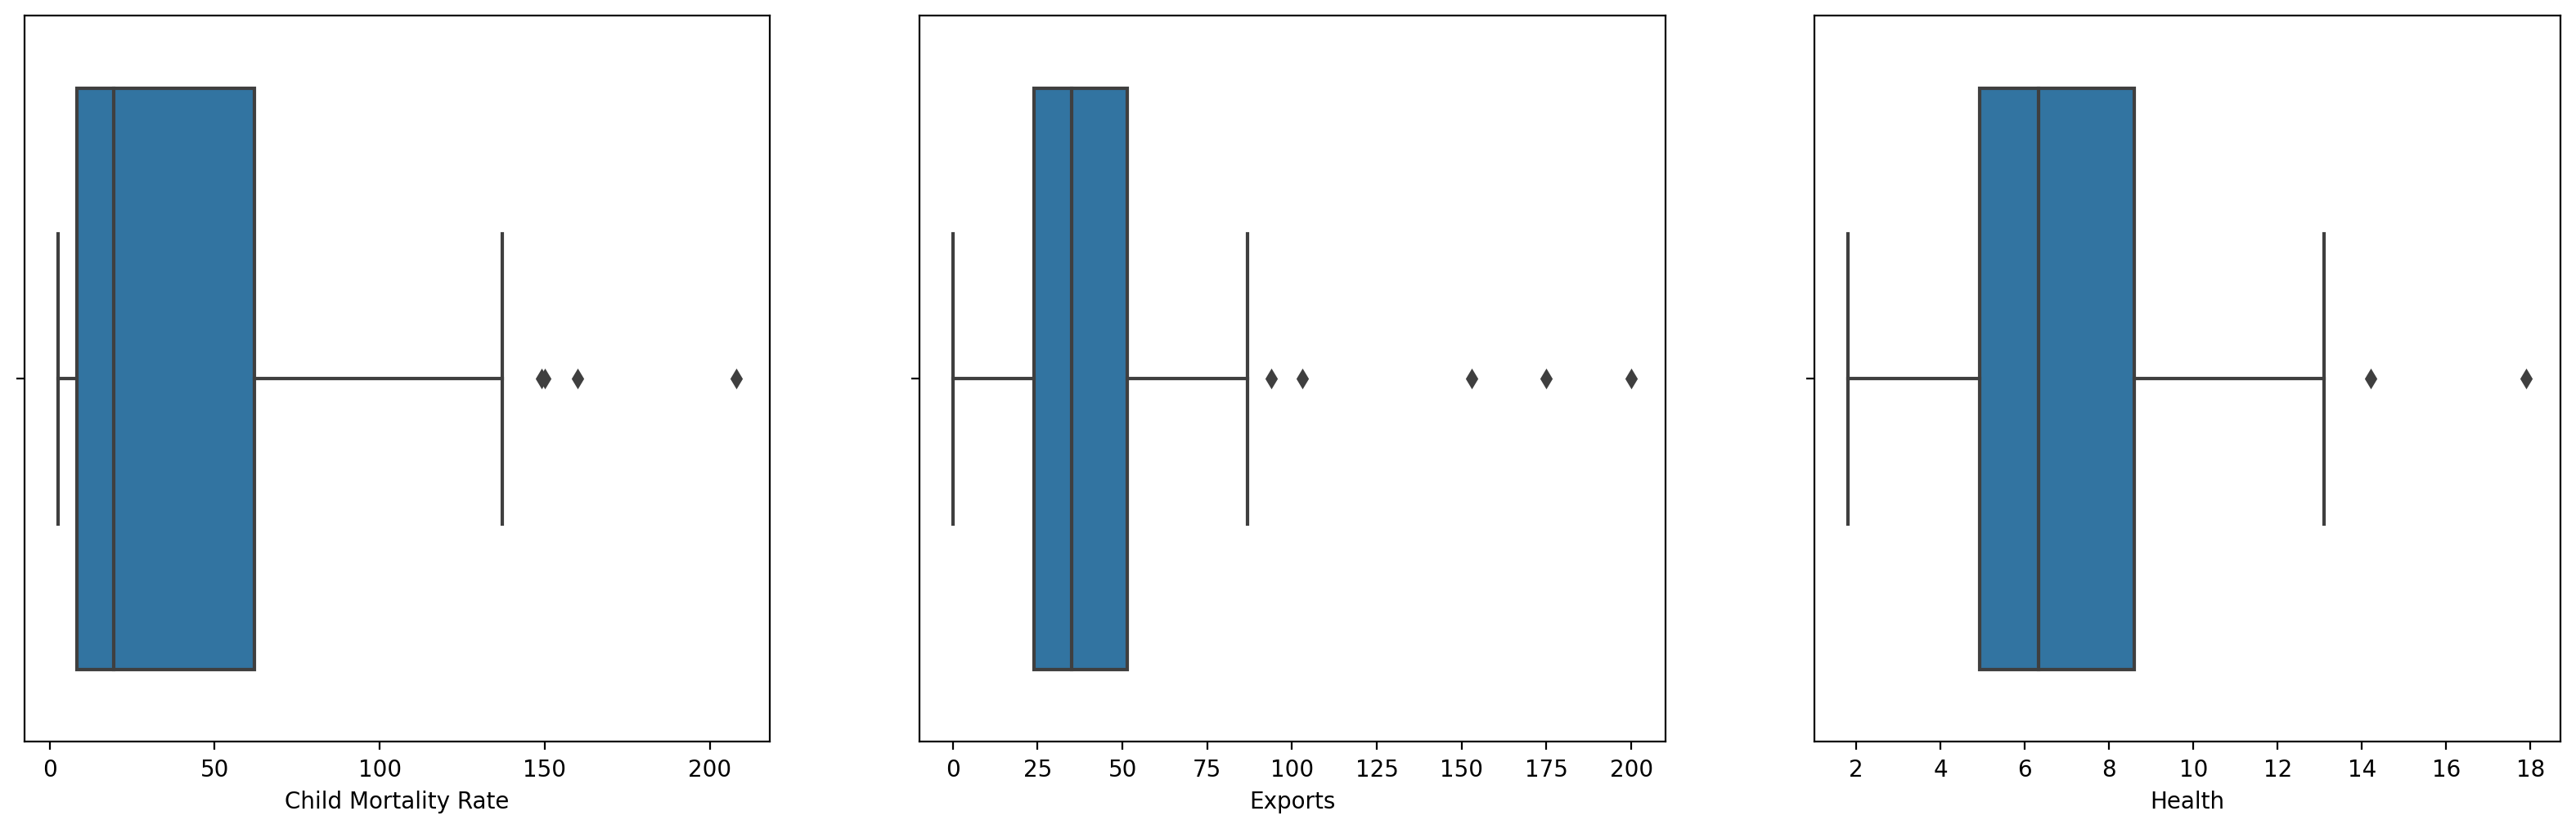

In [7]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(3,3,1)
sns.boxplot(x='child_mort', data=data)
plt.xlabel('Child Mortality Rate')

plt.subplot(3,3,2)
sns.boxplot(x='exports', data=data)
plt.xlabel('Exports')

plt.subplot(3,3,3)
sns.boxplot(x='health', data=data)
plt.xlabel('Health')


Text(0.5, 0, 'Inflation')

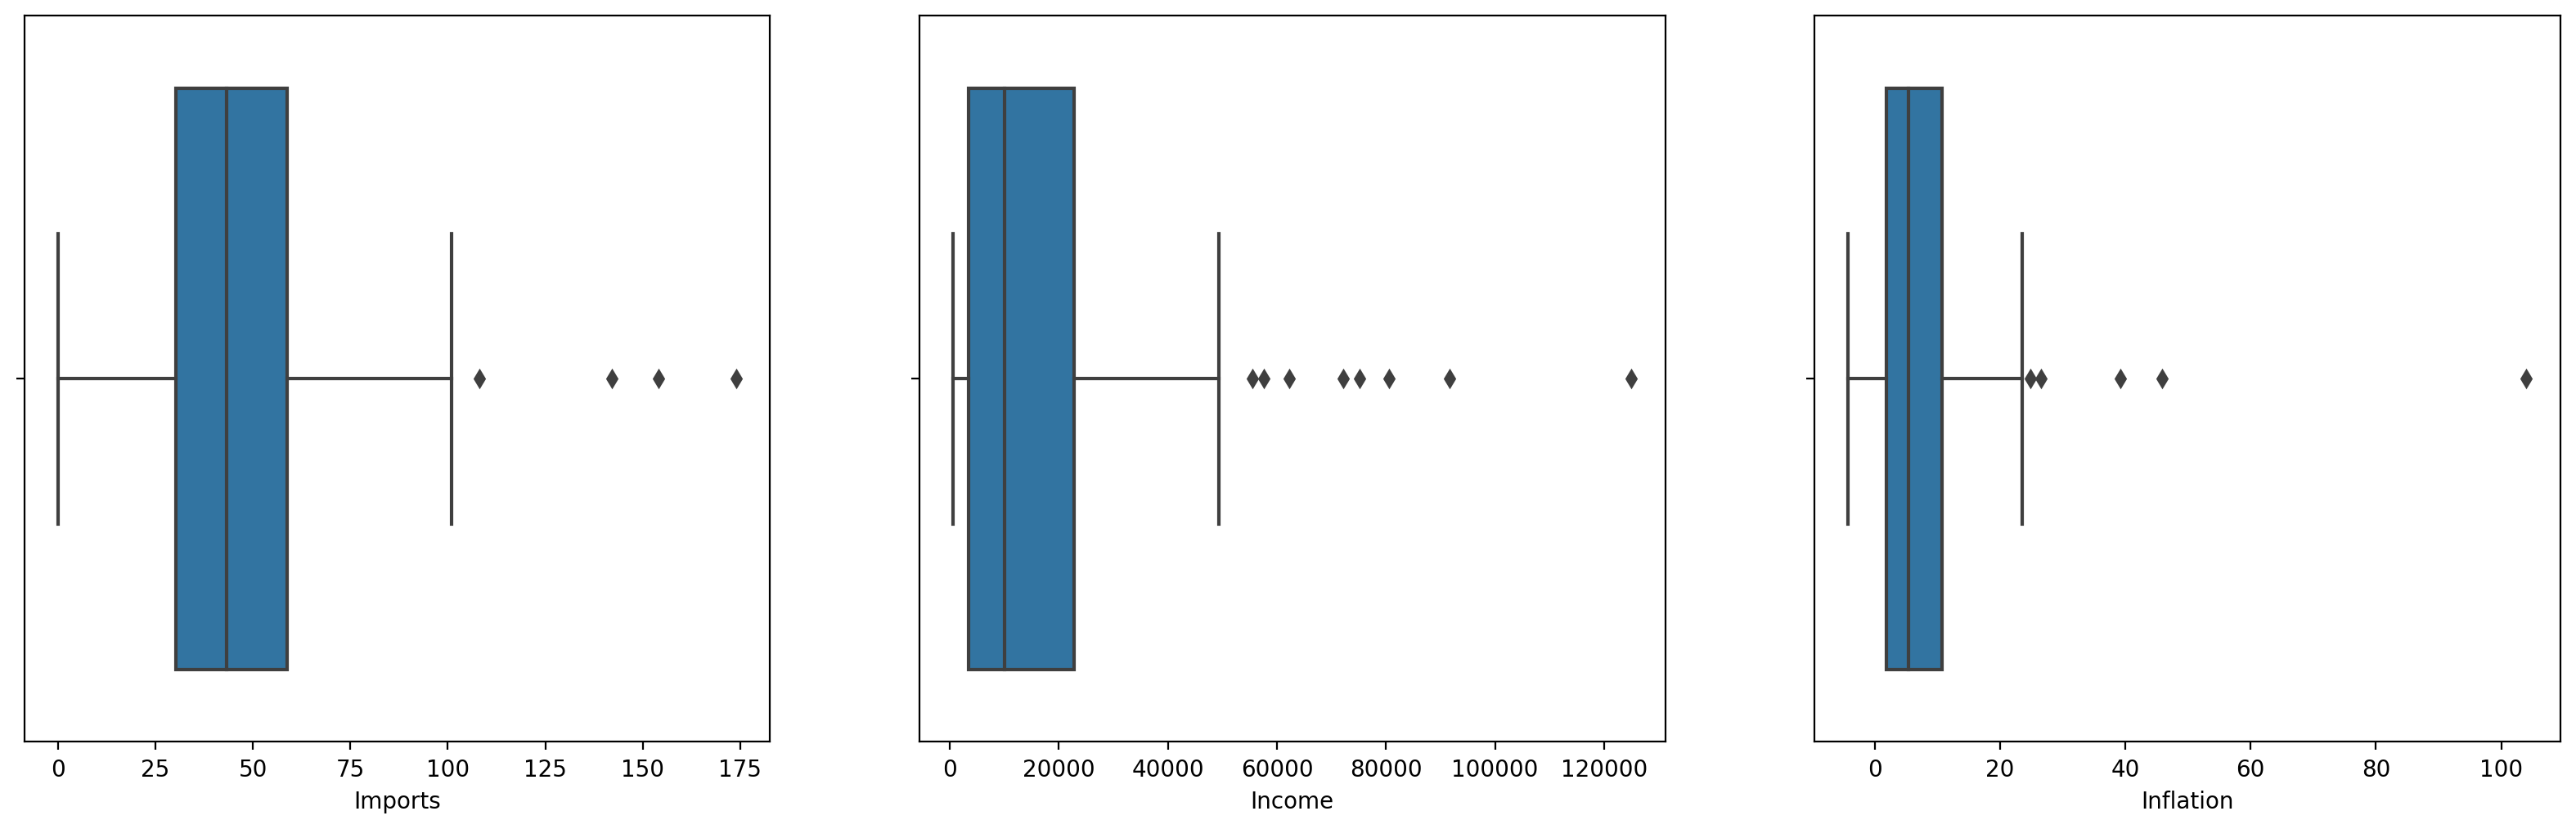

In [8]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(3,3,1)
sns.boxplot(x='imports', data=data)
plt.xlabel('Imports')

plt.subplot(3,3,2)
sns.boxplot(x='income', data=data)
plt.xlabel('Income')

plt.subplot(3,3,3)
sns.boxplot(x='inflation', data=data)
plt.xlabel('Inflation')



Text(0.5, 0, 'GDP Per Capita')

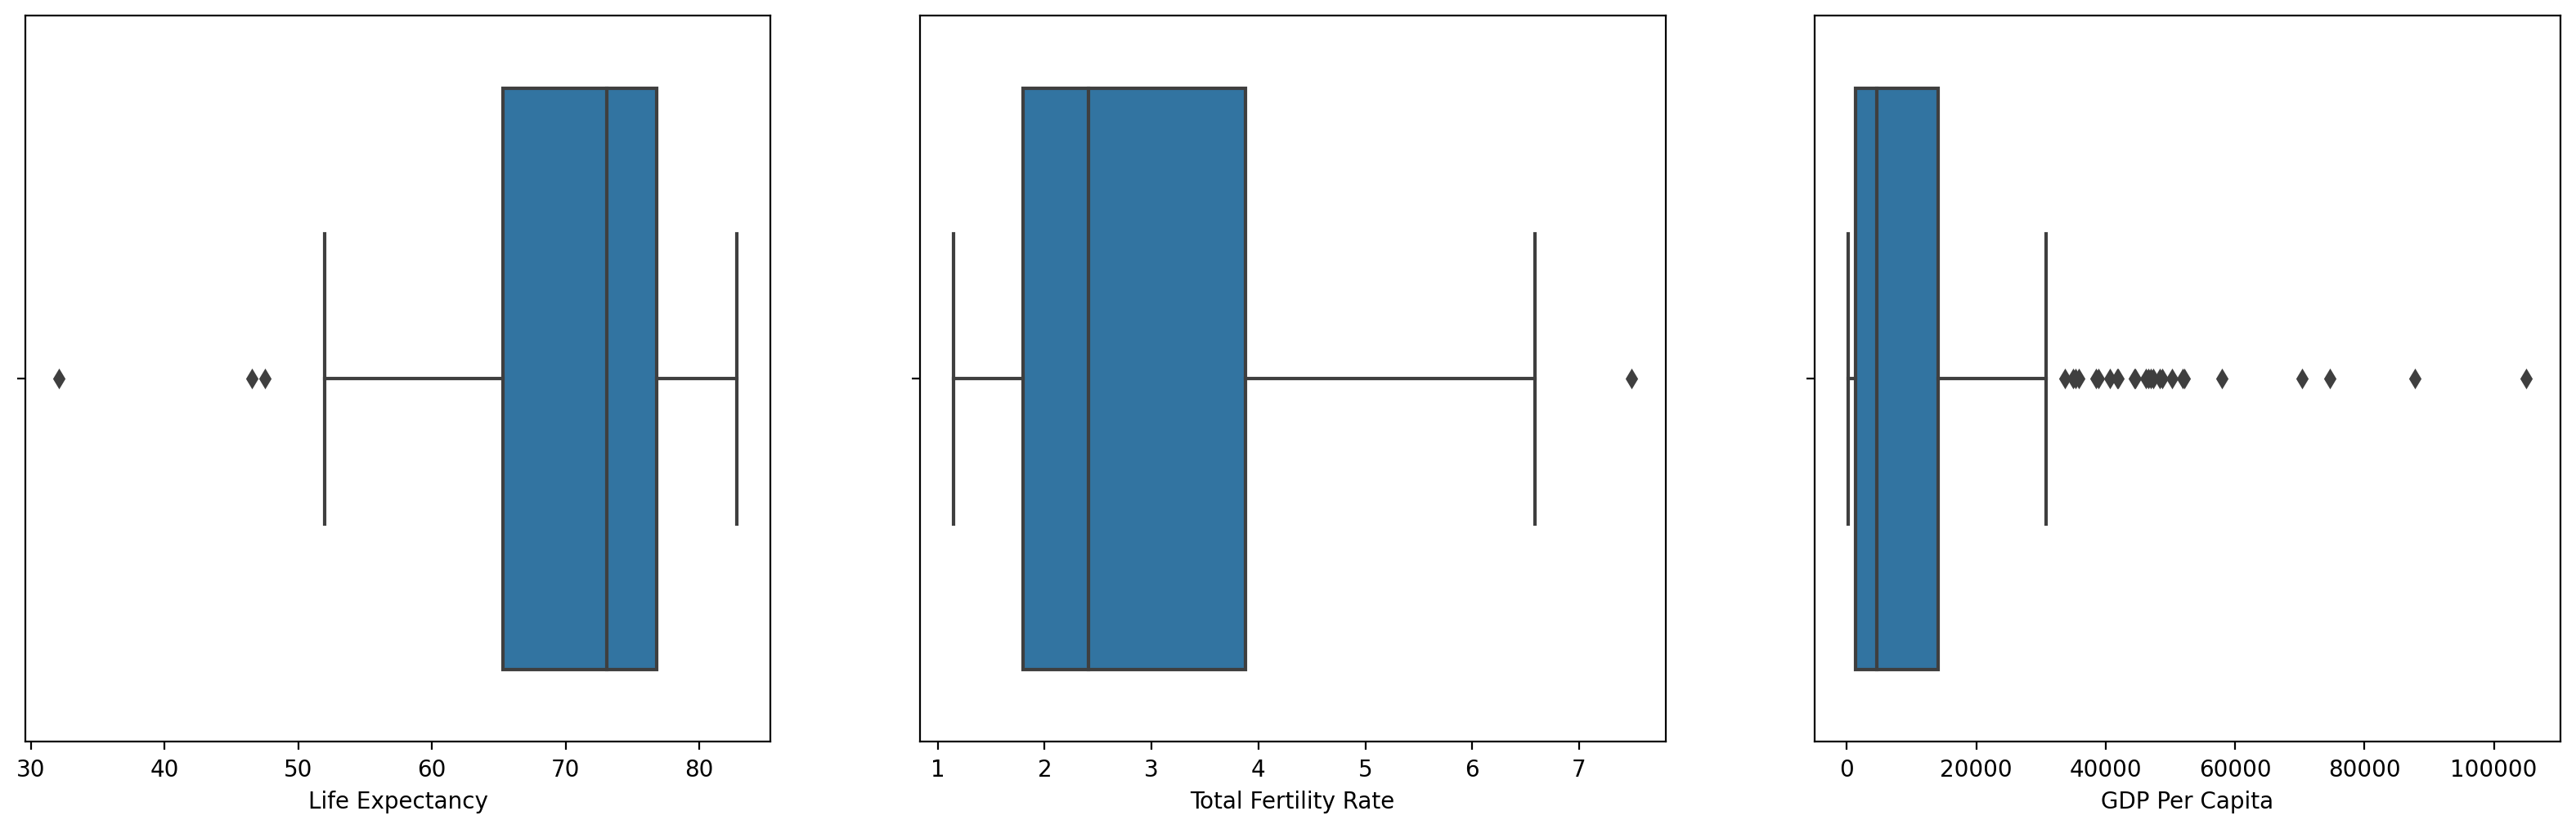

In [9]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(3,3,1)
sns.boxplot(x='life_expec', data=data)
plt.xlabel('Life Expectancy')


plt.subplot(3,3,2)
sns.boxplot(x='total_fer', data=data)
plt.xlabel('Total Fertility Rate')

plt.subplot(3,3,3)
sns.boxplot(x='gdpp', data=data)
plt.xlabel('GDP Per Capita')



#### Calculating Z_Score

##### We will put a threshold of zscore < 3 and store the dataframe in a new variable

In [10]:
# Custom function to calculate z-score
def z_score(values):
    mean = np.mean(values)
    std = np.std(values)
    z_scores = [(x - mean) / std for x in values]
    return z_scores
z_custom = np.array([z_score(data['child_mort'])])
np.abs(z_custom)

array([[1.29153238, 0.5389489 , 0.27283273, 2.00780766, 0.69563412,
        0.5911773 , 0.50164289, 0.8324228 , 0.84485813, 0.02312823,
        0.60858677, 0.73791425, 0.27680906, 0.5986385 , 0.81501333,
        0.839884  , 0.48423342, 1.8088423 , 0.11017558, 0.20717119,
        0.78019439, 0.35390814, 0.45936275, 0.69065998, 0.68319878,
        1.93319565, 1.37609265, 0.15245571, 1.73423029, 0.81252626,
        0.29272927, 2.75392774, 2.77879841, 0.73542719, 0.5613325 ,
        0.48920756, 1.24179104, 1.93319565, 0.63743377, 0.69812118,
        1.8088423 , 0.81501333, 0.8622676 , 0.86724173, 0.84983227,
        0.09625098, 0.32754821, 0.22806553, 0.47428516, 1.8088423 ,
        0.42105895, 0.839884  , 0.35241888, 0.87719   , 0.8473452 ,
        0.63245964, 1.04531275, 0.54143596, 0.8473452 , 0.906037  ,
        0.8548064 , 0.58869024, 0.07138031, 1.75910096, 1.88345431,
        0.01666484, 4.22129724, 0.80257799, 0.88713827, 0.51059336,
        0.12360872, 0.47179809, 0.03407431, 0.84

In [11]:
z_score = np.abs(stats.zscore(data[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]))
z_score

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,1.138280,0.279088,0.082455,0.808245,0.157336,1.619092,1.902882,0.679180
1,0.538949,0.479658,0.097016,0.070837,0.375369,0.312347,0.647866,0.859973,0.485623
2,0.272833,0.099122,0.966073,0.641762,0.220844,0.789274,0.670423,0.038404,0.465376
3,2.007808,0.775381,1.448071,0.165315,0.585043,1.387054,1.179234,2.128151,0.516268
4,0.695634,0.160668,0.286894,0.497568,0.101732,0.601749,0.704258,0.541946,0.041817
...,...,...,...,...,...,...,...,...,...
162,0.225578,0.200917,0.571711,0.240700,0.738527,0.489784,0.852161,0.365754,0.546913
163,0.526514,0.461363,0.695862,1.213499,0.033542,3.616865,0.546361,0.316678,0.029323
164,0.372315,1.130305,0.008877,1.380030,0.658404,0.409732,0.286958,0.661206,0.637754
165,0.448417,0.406478,0.597272,0.517472,0.658924,1.500916,0.344633,1.140944,0.637754


In [12]:
data_final = data[(z_score < 3).all(axis=1)]
data_final      

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [13]:
data_final.shape

(153, 10)

In [14]:
x_data = data_final.drop('country', axis=1)
y_data = data_final['country']

### PCA

In [15]:
#Trying SkLearn PCA first to see if my implementation works
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)
x_pca_final = pca_final.fit_transform(x_data)
x_pca_final.shape

(153, 4)

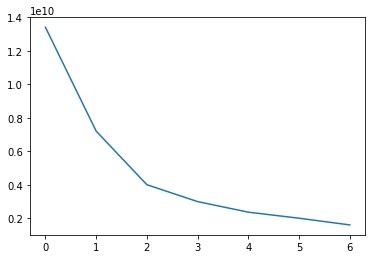

In [16]:
#import kmeans
from sklearn.cluster import KMeans
arr = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(num_clusters)
    kmeans.fit(x_data.to_numpy())
    
    arr.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(arr)

### K-Means Clustering

In [25]:
#KMeans class
class KMeansCustom:
    def __init__(self, n_clusters=5):
        self.n_clusters = n_clusters

    def fit(self, X): 
        n_inits = 5 
        jobs = []
        for init in range(n_inits):            
            cluster_centers = X[np.random.randint(0, len(X), self.n_clusters)]        
            for step in range(10):
                vote = []
                error = 0
                for point in X:
                    distances = np.sum((cluster_centers - point) ** 2, axis=1) ** .5
                    vote.append(distances.argmin())
                    error += distances[distances.argmin()]
                npvote = np.array(vote)
                for i in range(self.n_clusters):
                    cluster_centers[i] = (X[npvote == i]).mean(axis=0)            
            jobs.append([error, cluster_centers, npvote])
        
        idx = np.array([job[0] for job in jobs]).argmin()        
        error, cluster_centers, npvote = jobs[idx]        
        self.labels_ = npvote
        self.cluster_centers_ = cluster_centers

In [18]:
model = KMeansCustom(3)
model.fit(x_data.to_numpy())
data_final['Cluster'] = model.labels_


/tmp/ipykernel_47545/1645247521.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final['Cluster'] = model.labels_


In [19]:
model_pca = KMeansCustom(3)
model_pca.fit(x_pca_final)


/tmp/ipykernel_47545/1611629421.py:20: RuntimeWarning: Mean of empty slice.
  cluster_centers[i] = (X[npvote == i]).mean(axis=0)
/home/Divyansh/.local/lib/python3.10/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [20]:
data_final

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,2
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2


### Conclusions

<AxesSubplot:ylabel='gdpp'>

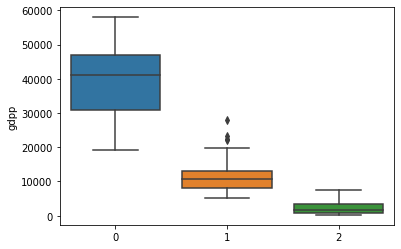

In [21]:
sns.boxplot(x=model.labels_, y='gdpp', data=x_data)

This implies that the cluste 2 represents the countries with the lowest GDPP

<AxesSubplot:xlabel='Cluster', ylabel='gdpp'>

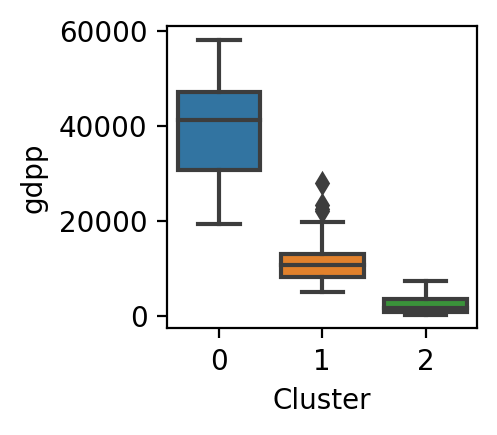

In [22]:
plt.figure(figsize=(2,2),dpi=200)
sns.boxplot(x='Cluster', y='gdpp', data=data_final)


<AxesSubplot:xlabel='Cluster', ylabel='income'>

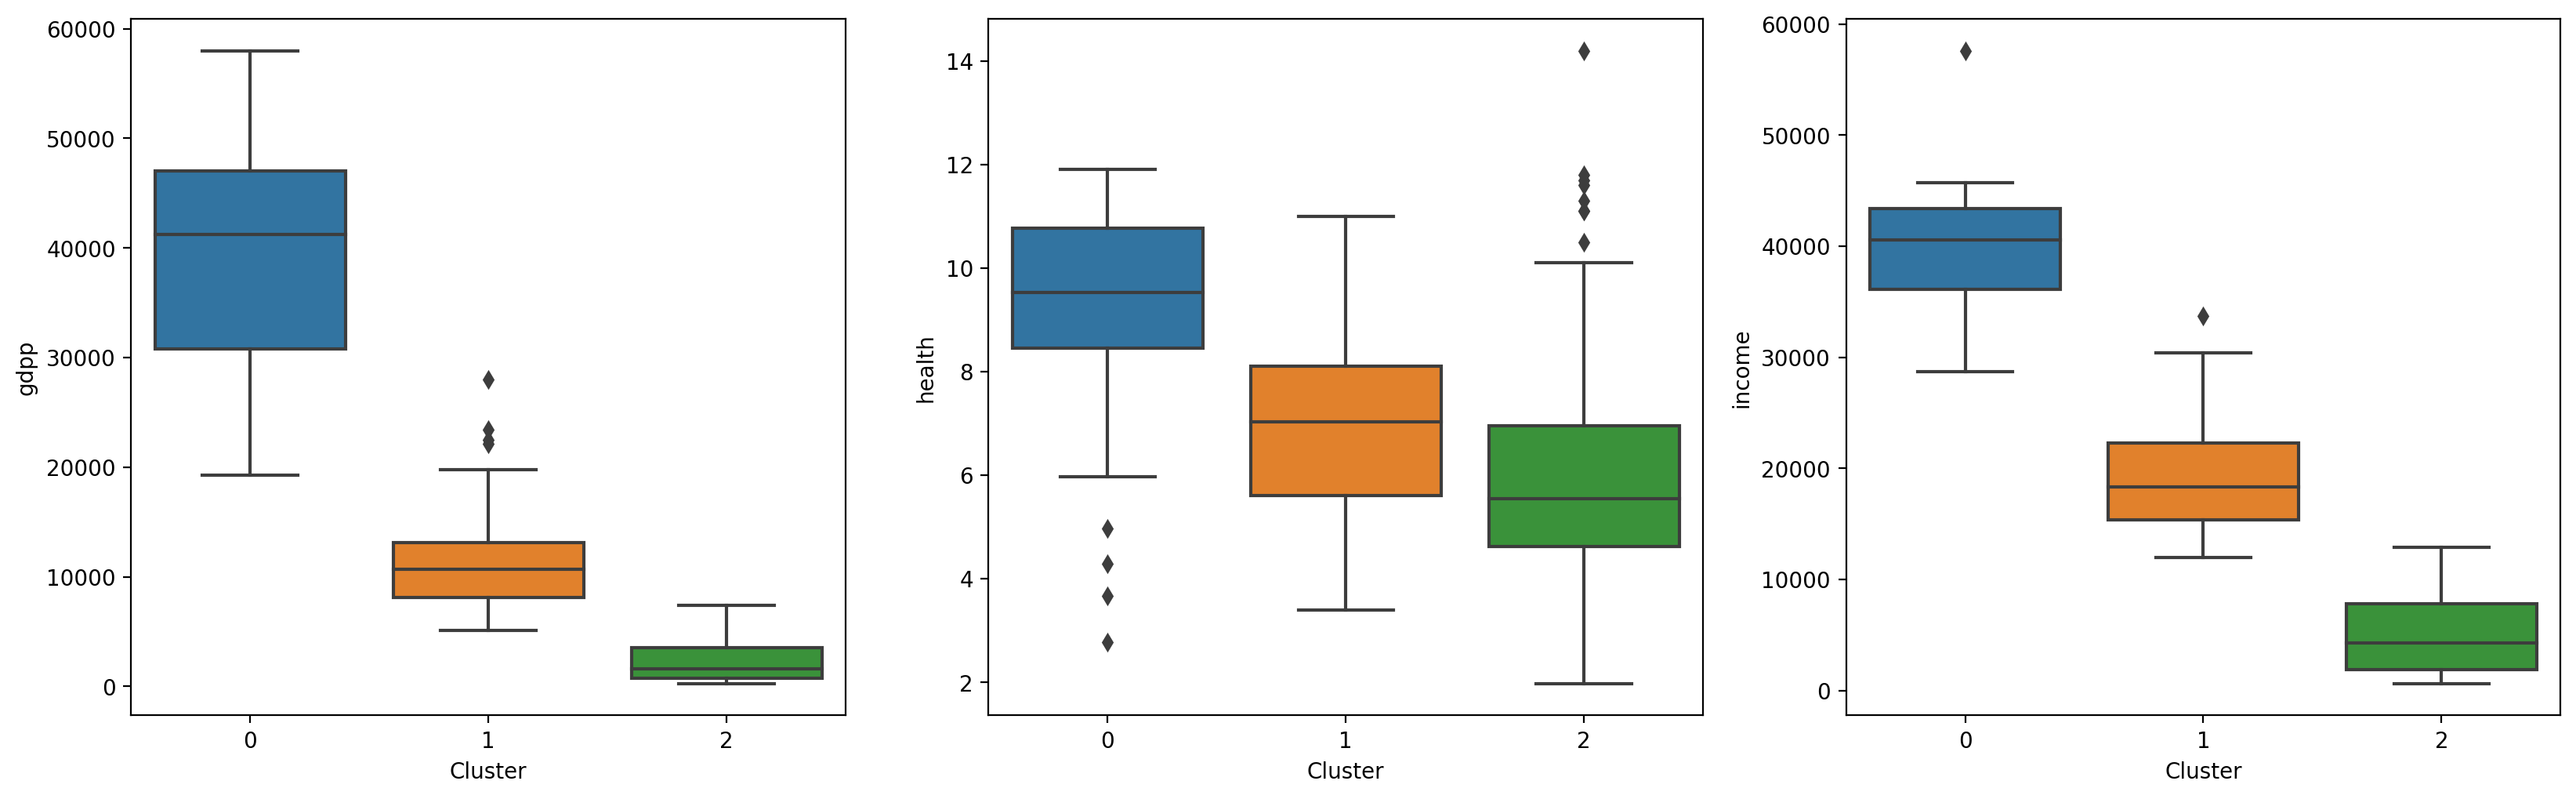

In [23]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(3,3,1)
sns.boxplot(x='Cluster', y='gdpp', data=data_final)

plt.subplot(3,3,2)
sns.boxplot(x='Cluster', y='health', data=data_final)


plt.subplot(3,3,3)
sns.boxplot(x='Cluster', y='income', data=data_final)


<AxesSubplot:xlabel='income', ylabel='health'>

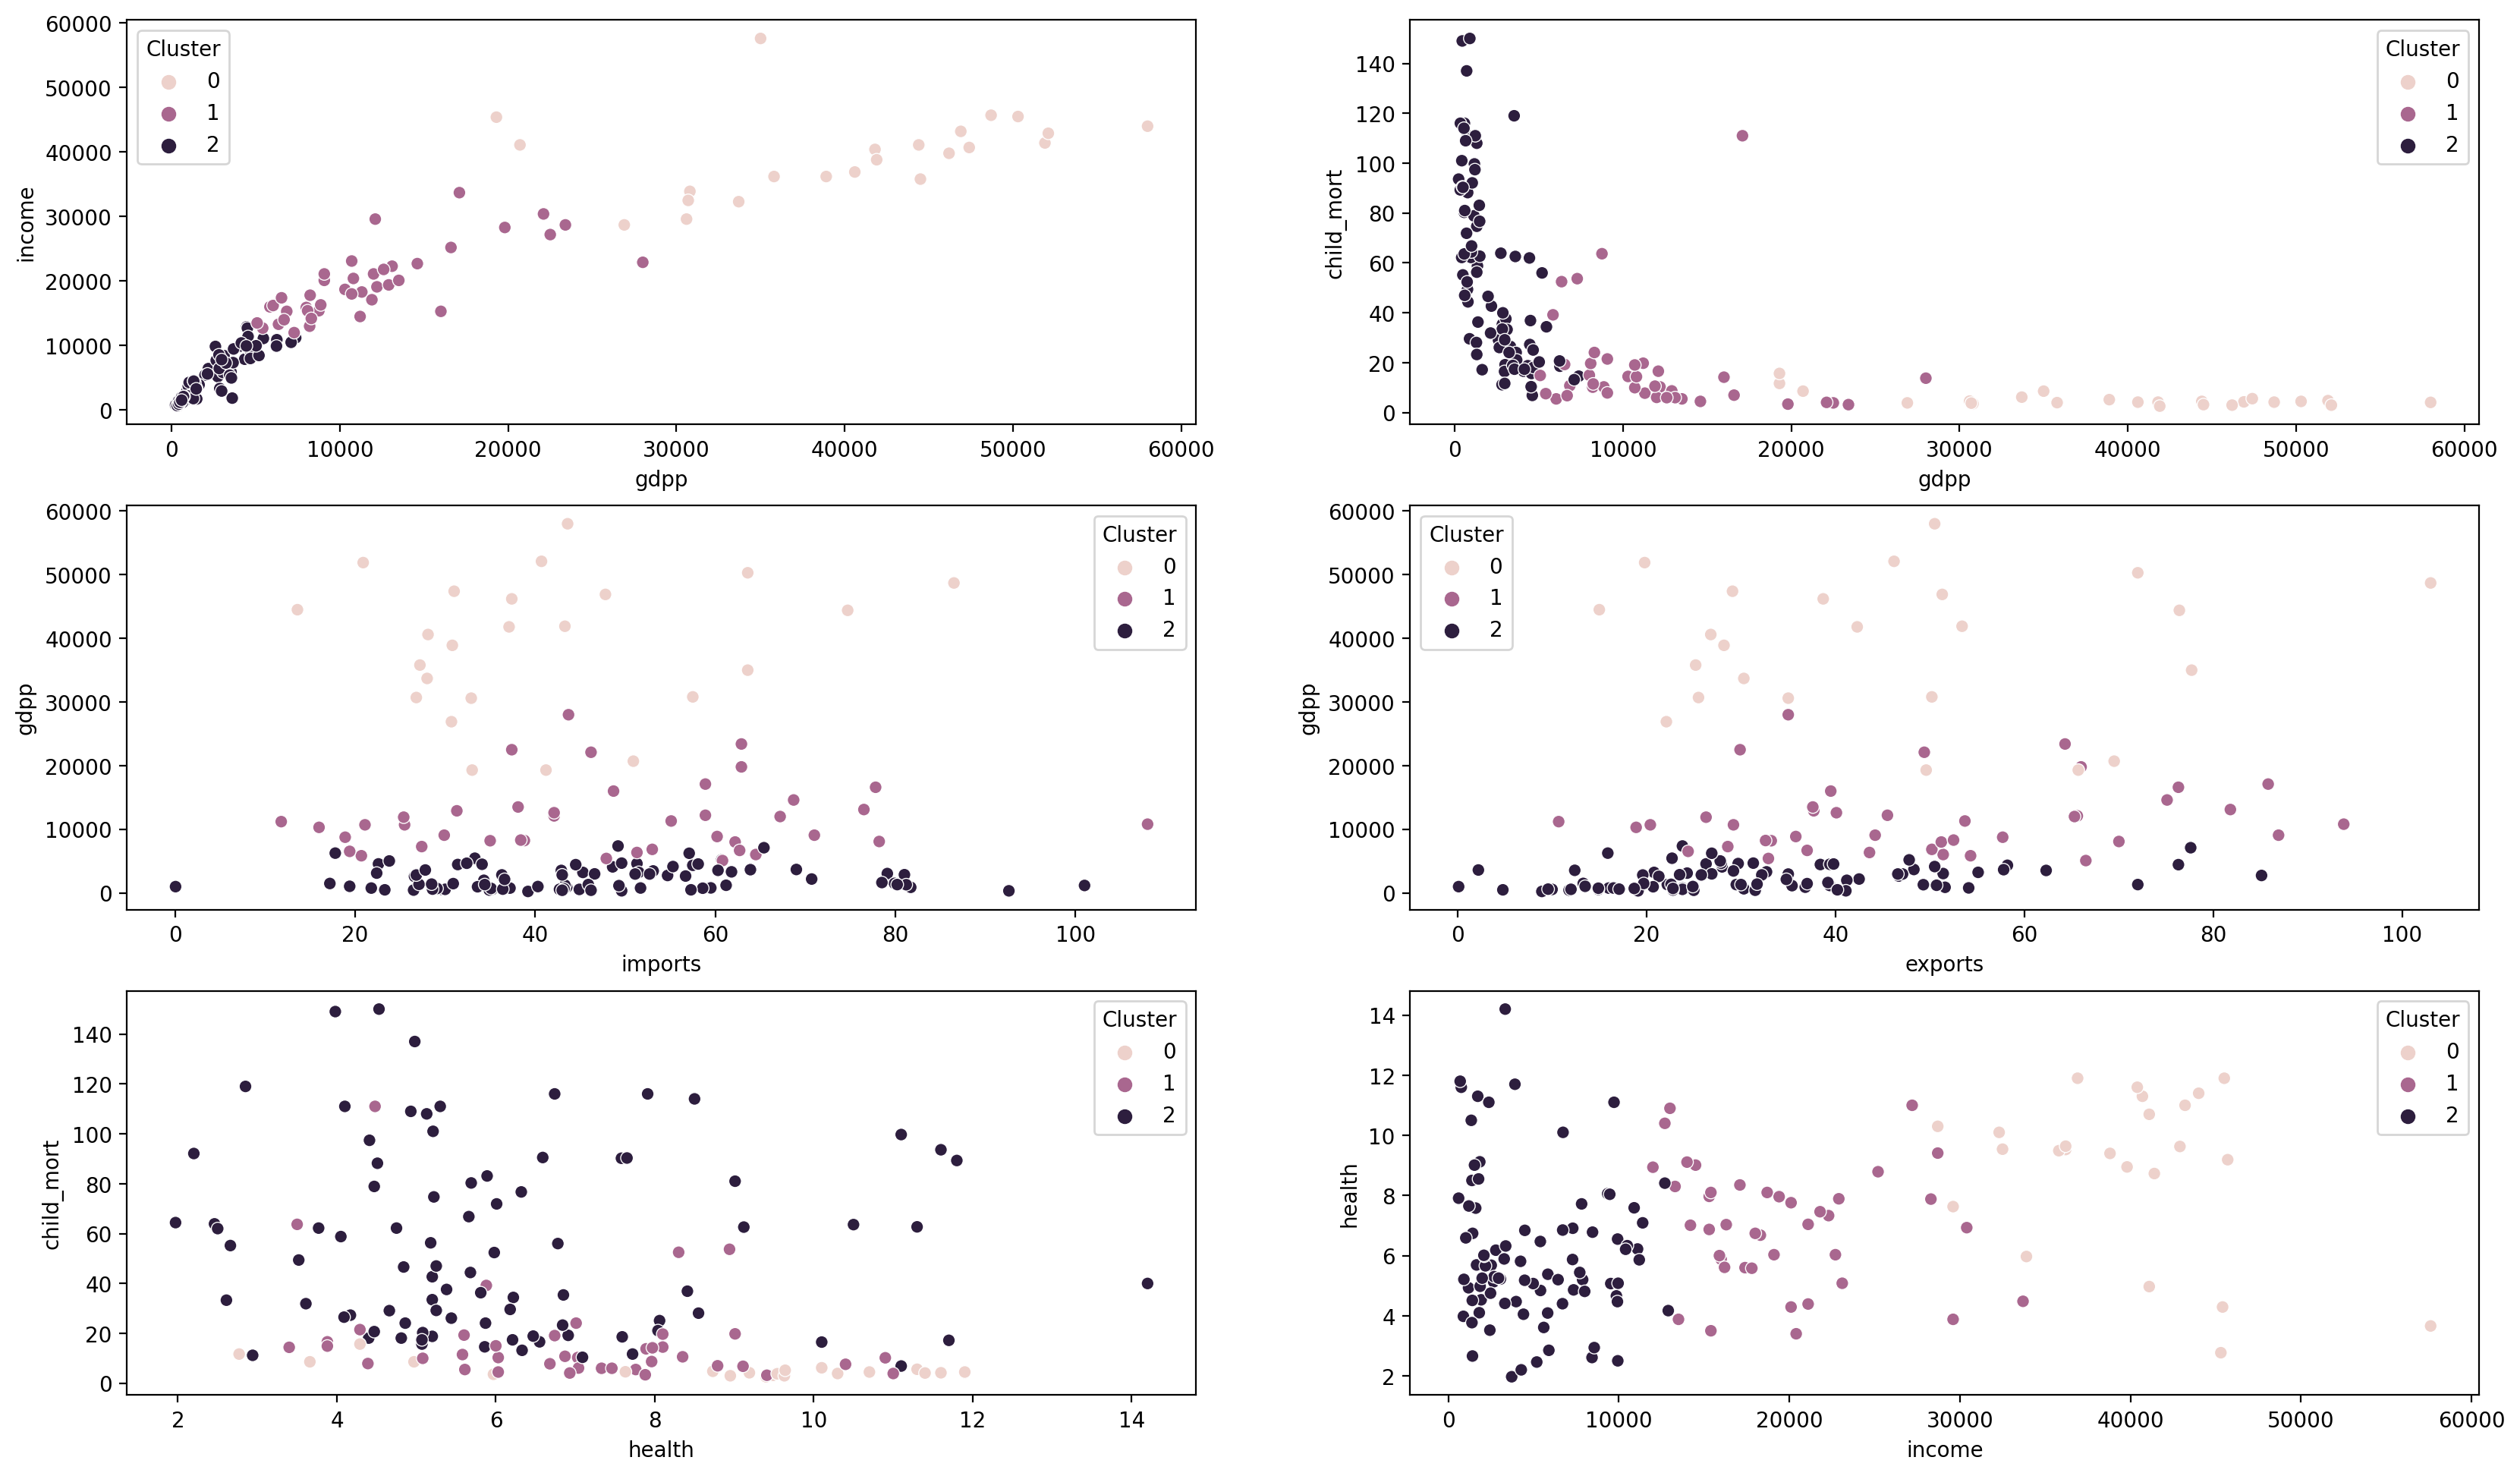

In [24]:
plt.figure(figsize=(20,12),dpi=200)

plt.subplot(3,2,1)
sns.scatterplot(x='gdpp', y='income', data = data_final, hue='Cluster')

plt.subplot(3,2,2)
sns.scatterplot(x='gdpp', y='child_mort', data = data_final, hue='Cluster')


plt.subplot(3,2,3)
sns.scatterplot(x='imports', y='gdpp', data = data_final, hue='Cluster')


plt.subplot(3,2,4)
sns.scatterplot(x='exports', y='gdpp', data = data_final, hue='Cluster')

plt.subplot(3,2,5)
sns.scatterplot(x='health', y='child_mort', data = data_final, hue='Cluster')

plt.subplot(3,2,6)
sns.scatterplot(x='income', y='health', data = data_final, hue='Cluster')



#### Conclusions
GDP directly propertional to income


Lower GDPP means lower infrastructure for medical facilities hence high child mortality rate


Imports and GDPP have no direct relation as the quantity and quality of import/export matters

Child mortality is higher in the lower areas of health spending per capita

Health spending per capita does not correspond to a direct increase in per person income
